In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns

# Data

## Sensor Data

In [2]:
## read data
result = pd.read_csv(os.path.join('result0625.csv'))
result.time = pd.to_datetime(result.time)
result.index = pd.to_datetime(result.time)

In [3]:
result

,time,eco2,TVOC,pm10_env,pm10_standard,pm25_env,pm25_standard,pm100_env,pm100_standard,tem,CO2,hum,tem_in
time,,,,,,,,,,,,,
2021-05-20 12:48:00,2021-05-20 12:48:00,400.0,0.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,26.600000,880.000000,40.800000,79.88
2021-05-20 12:49:00,2021-05-20 12:49:00,400.0,0.0,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,26.600000,858.500000,40.200000,79.88
2021-05-20 12:50:00,2021-05-20 12:50:00,400.0,0.0,0.666667,0.666667,1.666667,1.666667,2.333333,2.333333,26.666667,838.666667,38.966667,80.00
2021-05-20 12:51:00,2021-05-20 12:51:00,400.0,0.0,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,26.650000,768.000000,39.000000,79.97
2021-05-20 12:52:00,2021-05-20 12:52:00,400.0,0.0,1.000000,0.500000,1.500000,1.500000,1.500000,1.500000,26.600000,750.000000,38.600000,79.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 20:25:00,2021-06-25 20:25:00,400.0,0.0,10.500000,10.500000,13.500000,13.500000,12.000000,13.500000,26.250000,445.000000,49.000000,79.25
2021-06-25 20:26:00,2021-06-25 20:26:00,400.0,0.0,10.000000,10.000000,12.000000,12.000000,13.000000,12.000000,26.200000,443.000000,48.850000,79.16
2021-06-25 20:27:00,2021-06-25 20:27:00,400.0,0.0,9.500000,9.500000,12.500000,12.500000,13.000000,13.000000,26.200000,441.000000,48.800000,79.16


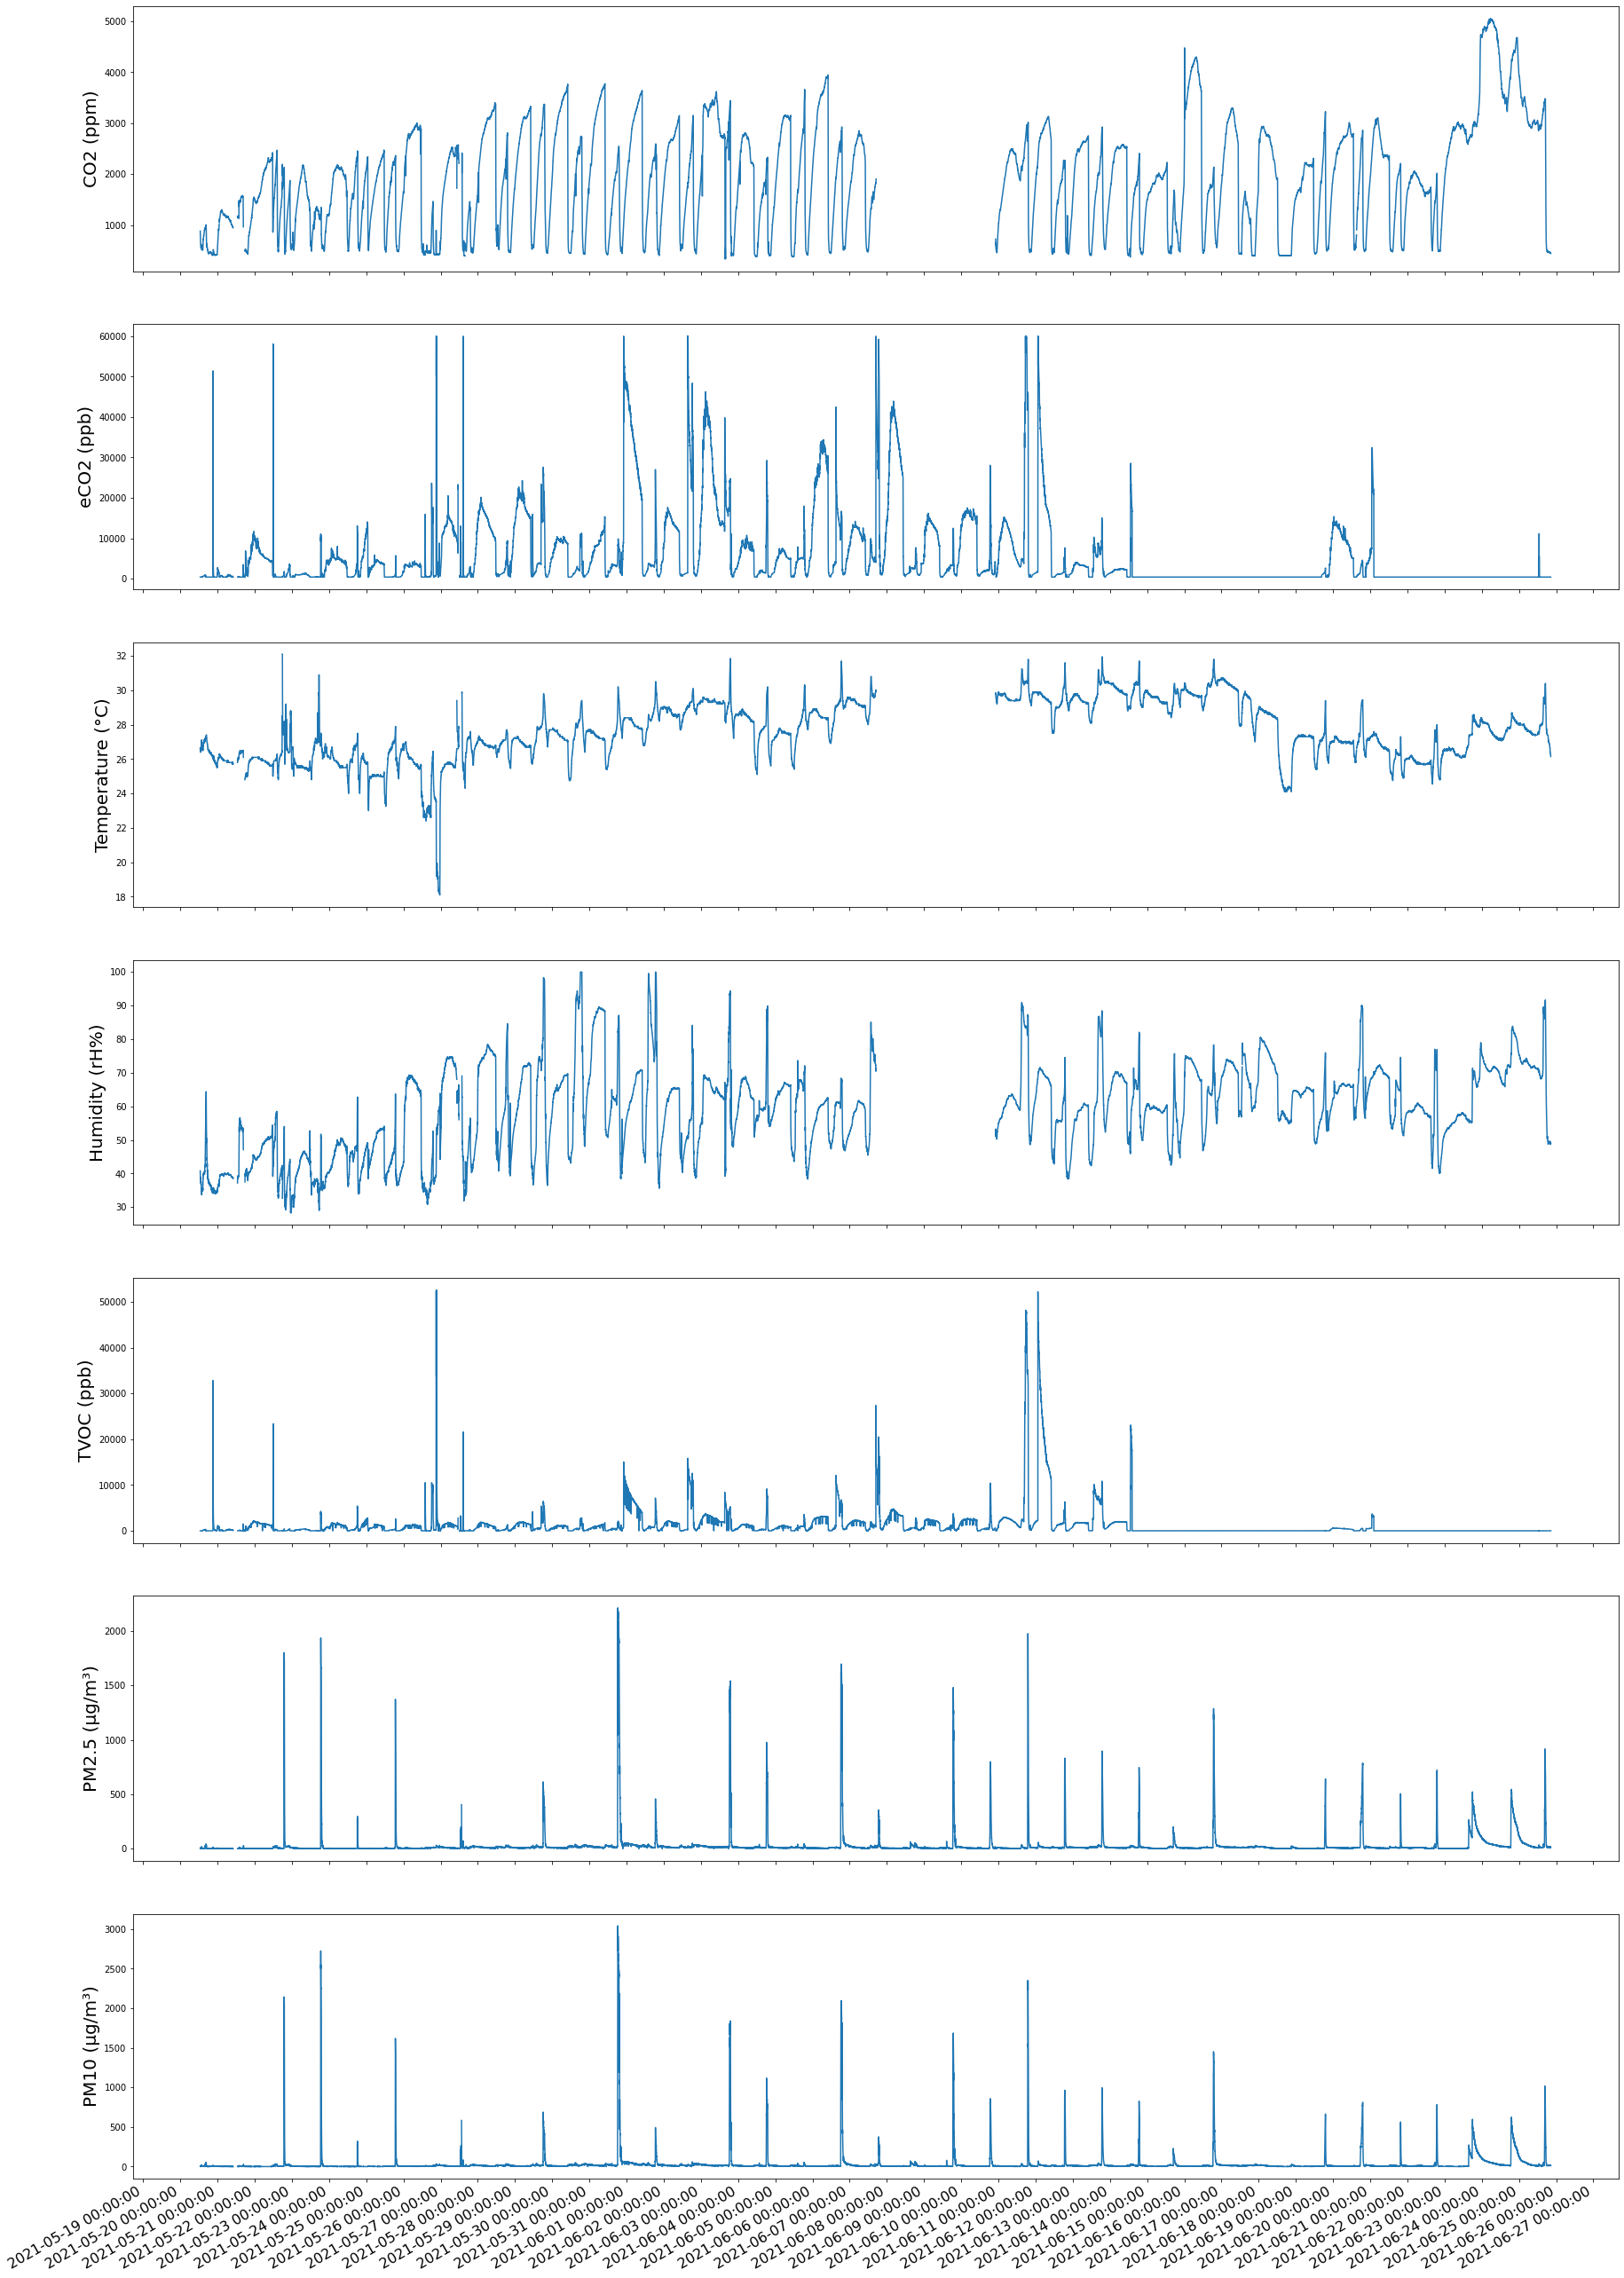

In [4]:
## plot data from all sensors
fig = plt.figure(figsize=(30,50))
ax = fig.add_subplot(711)
ax.plot(result.index, result['CO2'])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.set_ylabel("CO2 (ppm)",fontsize=20)
ax2 = fig.add_subplot(712,sharex = ax)
ax2.plot(result.index, result['eco2'])

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax2.xaxis.set_major_locator(mdates.DayLocator())
ax2.set_ylabel("eCO2 (ppb)",fontsize=20)
ax3 = fig.add_subplot(713,sharex = ax)
ax3.plot(result.index, result['tem'])

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax3.xaxis.set_major_locator(mdates.DayLocator())
ax3.set_ylabel("Temperature (°C)",fontsize=20)
# format your data to desired format. Here I chose YYYY-MM-DD but you can set it to whatever you want.
ax4 = fig.add_subplot(714,sharex = ax)
ax4.plot(result.index, result['hum'])

ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax4.xaxis.set_major_locator(mdates.DayLocator())
ax4.set_ylabel("Humidity (rH%)",fontsize=20)
ax5 = fig.add_subplot(715,sharex = ax)
ax5.plot(result.index, result['TVOC'])

ax5.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax5.xaxis.set_major_locator(mdates.DayLocator())
ax5.set_ylabel("TVOC (ppb)",fontsize=20)
ax6 = fig.add_subplot(716,sharex = ax)
ax6.plot(result.index, result['pm25_env'])

ax6.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax6.xaxis.set_major_locator(mdates.DayLocator())
ax6.set_ylabel("PM2.5 (µg/m³)",fontsize=20)
ax7 = fig.add_subplot(717,sharex = ax)
ax7.plot(result.index, result['pm100_env'])

ax7.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax7.xaxis.set_major_locator(mdates.DayLocator())
ax7.set_ylabel("PM10 (µg/m³)",fontsize=20)
# rotate and align the tick labels so they look better
ax7.tick_params(axis='x', which='major', labelsize=16)
ax7.tick_params(axis='x', which='minor', labelsize=16)
fig.autofmt_xdate()


## Three CO2 trends

In [5]:
##load data
data529 = pd.read_csv(os.path.join('0529.csv'))
data613 = pd.read_csv(os.path.join('0613.csv'))
data616 = pd.read_csv(os.path.join('0616.csv'))
data529.time = pd.to_datetime(data529.time)
data613.time = pd.to_datetime(data613.time)
data616.time = pd.to_datetime(data616.time)
data529.index = data529.time 
data613.index = data613.time 
data616.index = data616.time 

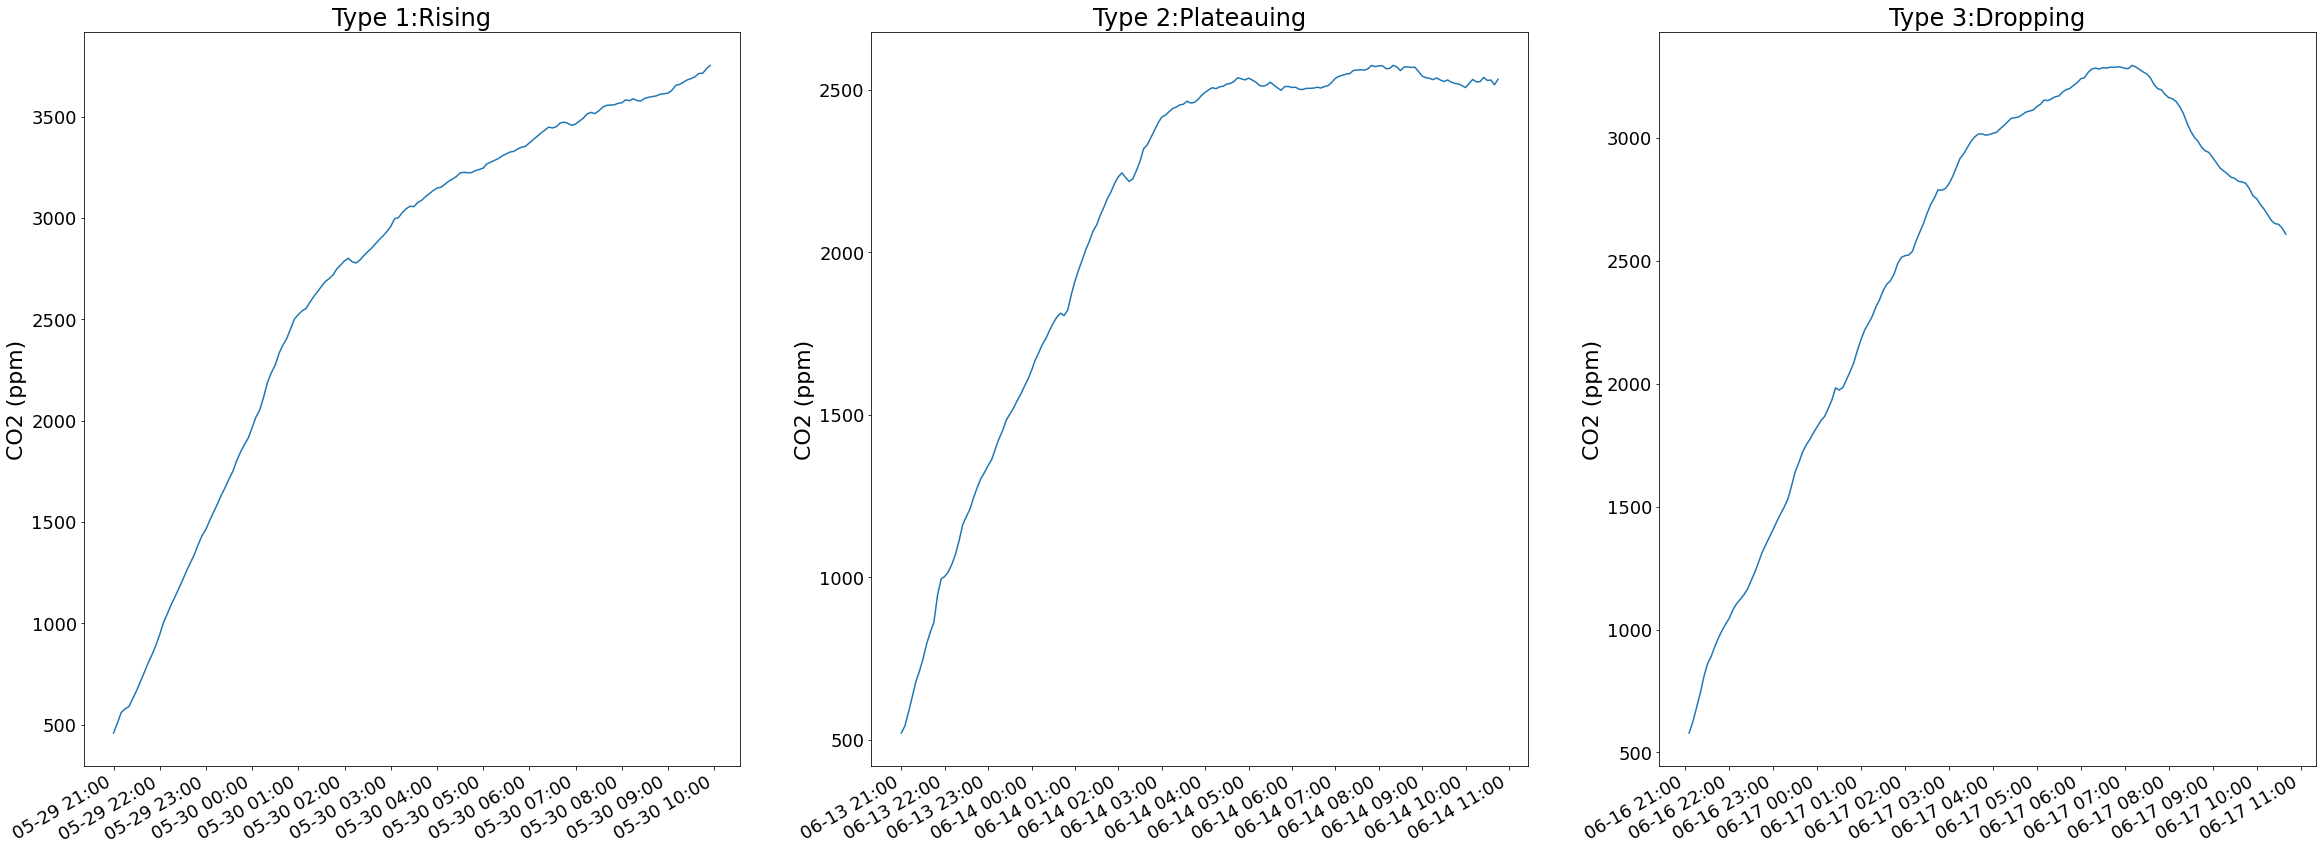

In [6]:
## plot three co2 trends
fig, axes = plt.subplots(ncols=3,figsize=(40, 15))

axes[0].plot(data529.index, data529['CO2'])

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[0].xaxis.set_major_locator(mdates.HourLocator())
axes[0].set_ylabel("CO2 (ppm)",fontsize=22)
axes[0].tick_params(axis='x', which='major', labelsize=18)
axes[0].tick_params(axis='x', which='minor', labelsize=18)
axes[0].tick_params(axis='y',  labelsize=18)
# rotate and align the tick labels so they look better
axes[0].set_title('Type 1:Rising',fontsize = 24)


axes[1].plot(data613.index, data613['CO2'])
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[1].xaxis.set_major_locator(mdates.HourLocator())
axes[1].set_ylabel("CO2 (ppm)",fontsize=22)
axes[1].tick_params(axis='x', which='major', labelsize=18)
axes[1].tick_params(axis='x', which='minor', labelsize=18)
axes[1].tick_params(axis='y',  labelsize=18)
axes[1].set_title('Type 2:Plateauing',fontsize =24)


axes[2].plot(data616.index, data616['CO2'])
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[2].xaxis.set_major_locator(mdates.HourLocator())
axes[2].set_ylabel("CO2 (ppm)",fontsize=22)
axes[2].tick_params(axis='x', which='major', labelsize=18)
axes[2].tick_params(axis='x', which='minor', labelsize=18)
axes[2].tick_params(axis='y',  labelsize=18)
axes[2].set_title('Type 3:Dropping',fontsize =24)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

## Longest Time Series Data

In [7]:
## load the longest time series data
cor1625 =pd.read_csv(os.path.join('0625.csv'))
cor1625.time = pd.to_datetime(cor1625.time)
cor1625.index = cor1625.time

In [8]:
cor1625

,time,Eco2,TVOC,pm10_env,pm10_standard,PM2.5,pm25_standard,pm100_env,pm100_standard,tem,...,Humidity_out,Wind,Wind Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,deltatemp
time,,,,,,,,,,,,,,,,,,,,,
2021-06-22 21:05:00,2021-06-22 21:05:00,400.9,1.0,1.9,1.9,2.5,2.5,2.4,2.7,24.80,...,60,NNE,1.9,2.0 mph,30.32 in,0.00 in,0.00 in,0,10.2 w/m²,18.540
2021-06-22 21:10:00,2021-06-22 21:10:00,400.9,1.0,2.3,2.3,3.0,3.0,3.1,3.1,24.88,...,60,NE,3.0,3.1 mph,30.32 in,0.00 in,0.00 in,0,8.2 w/m²,18.784
2021-06-22 21:15:00,2021-06-22 21:15:00,400.9,1.0,2.3,2.3,3.4,3.4,3.6,3.5,25.08,...,60,NNE,4.0,4.4 mph,30.32 in,0.00 in,0.00 in,0,6.5 w/m²,19.344
2021-06-22 21:20:00,2021-06-22 21:20:00,400.9,1.0,3.0,3.0,3.8,3.8,3.7,3.8,25.29,...,60,NNE,3.5,3.7 mph,30.33 in,0.00 in,0.00 in,0,4.9 w/m²,19.822
2021-06-22 21:25:00,2021-06-22 21:25:00,400.9,1.0,2.6,2.6,3.5,3.5,3.7,3.6,25.47,...,60,NNE,5.0,5.4 mph,30.33 in,0.00 in,0.00 in,0,3.8 w/m²,20.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 16:35:00,2021-06-25 16:35:00,400.0,0.0,296.2,445.3,401.0,602.6,420.3,610.0,29.48,...,48,SW,2.0,2.0 mph,30.08 in,0.00 in,0.01 in,6,719.5 w/m²,13.464
2021-06-25 16:40:00,2021-06-25 16:40:00,400.0,0.0,392.1,589.1,746.0,1120.0,867.1,1224.2,29.68,...,46,South,1.9,1.9 mph,30.08 in,0.00 in,0.01 in,5,708.7 w/m²,13.324
2021-06-25 16:45:00,2021-06-25 16:45:00,400.0,0.0,409.9,616.0,846.8,1271.2,937.8,1420.8,29.90,...,48,SSW,2.5,2.6 mph,30.08 in,0.00 in,0.01 in,3,288.1 w/m²,14.820


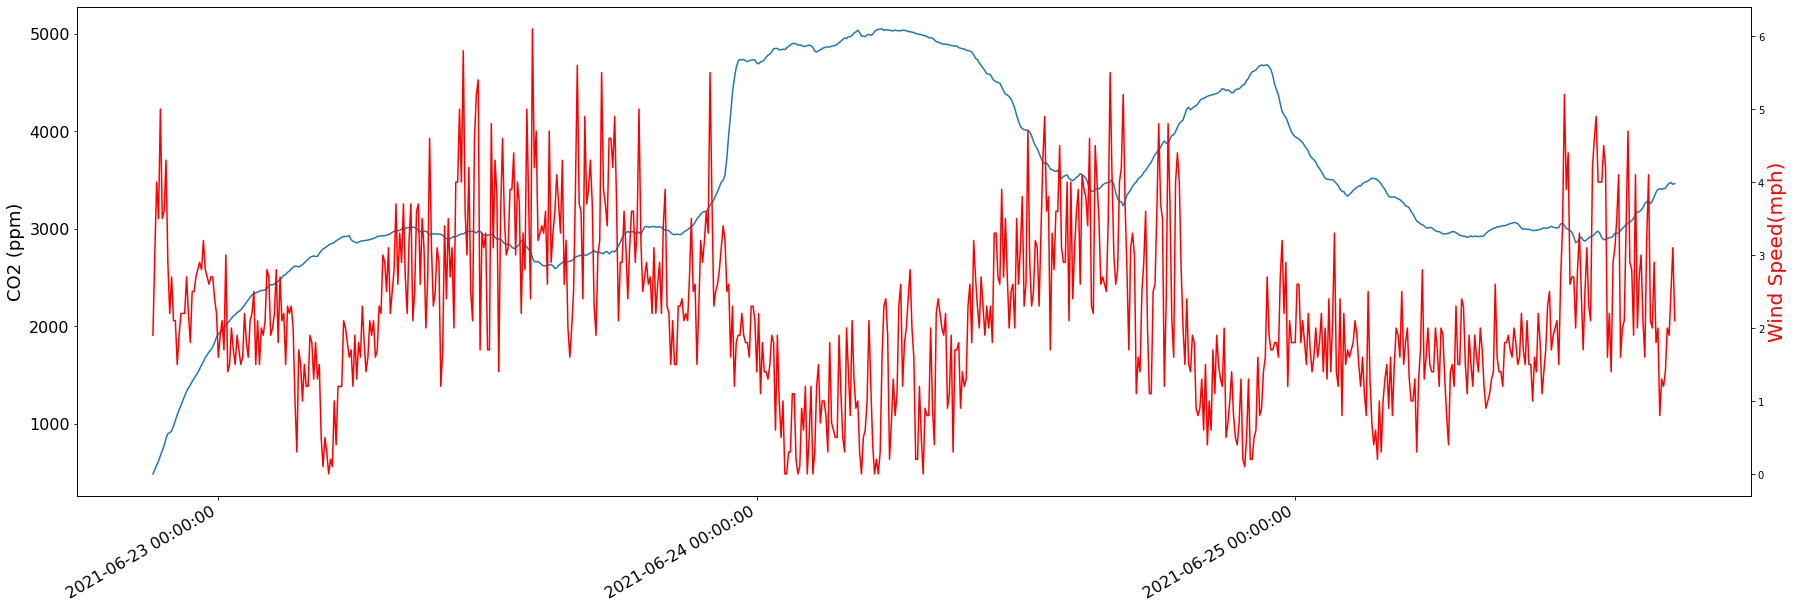

In [9]:
## plot the longest time series
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
ax.plot(cor1625.index, cor1625['CO2'])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.set_ylabel("CO2 (ppm)",fontsize=18)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='x', which='minor', labelsize=16)
ax.tick_params(axis='y',  labelsize=16)
ax.tick_params(axis='y',  labelsize=16)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(cor1625.index, cor1625['Wind Speed'],color = 'red')
ax2.set_ylabel("Wind Speed(mph)",color="red",fontsize=20)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

ax2.xaxis.set_major_locator(mdates.DayLocator())
# rotate and align the tick labels so they look better
fig.autofmt_xdate()


## Three Cooking Methods

In [10]:
##load data
boil0602 = pd.read_csv(os.path.join('0602_boil.csv'))
fry0529 = pd.read_csv(os.path.join('0529_fry.csv'))
deepfry0531 = pd.read_csv(os.path.join('0531_deepfry.csv'))
boil0602.time = pd.to_datetime(boil0602.time)
fry0529.time = pd.to_datetime(fry0529.time)
deepfry0531.time = pd.to_datetime(deepfry0531.time)
boil0602.index = boil0602.time 
fry0529.index = fry0529.time 
deepfry0531.index = deepfry0531.time 

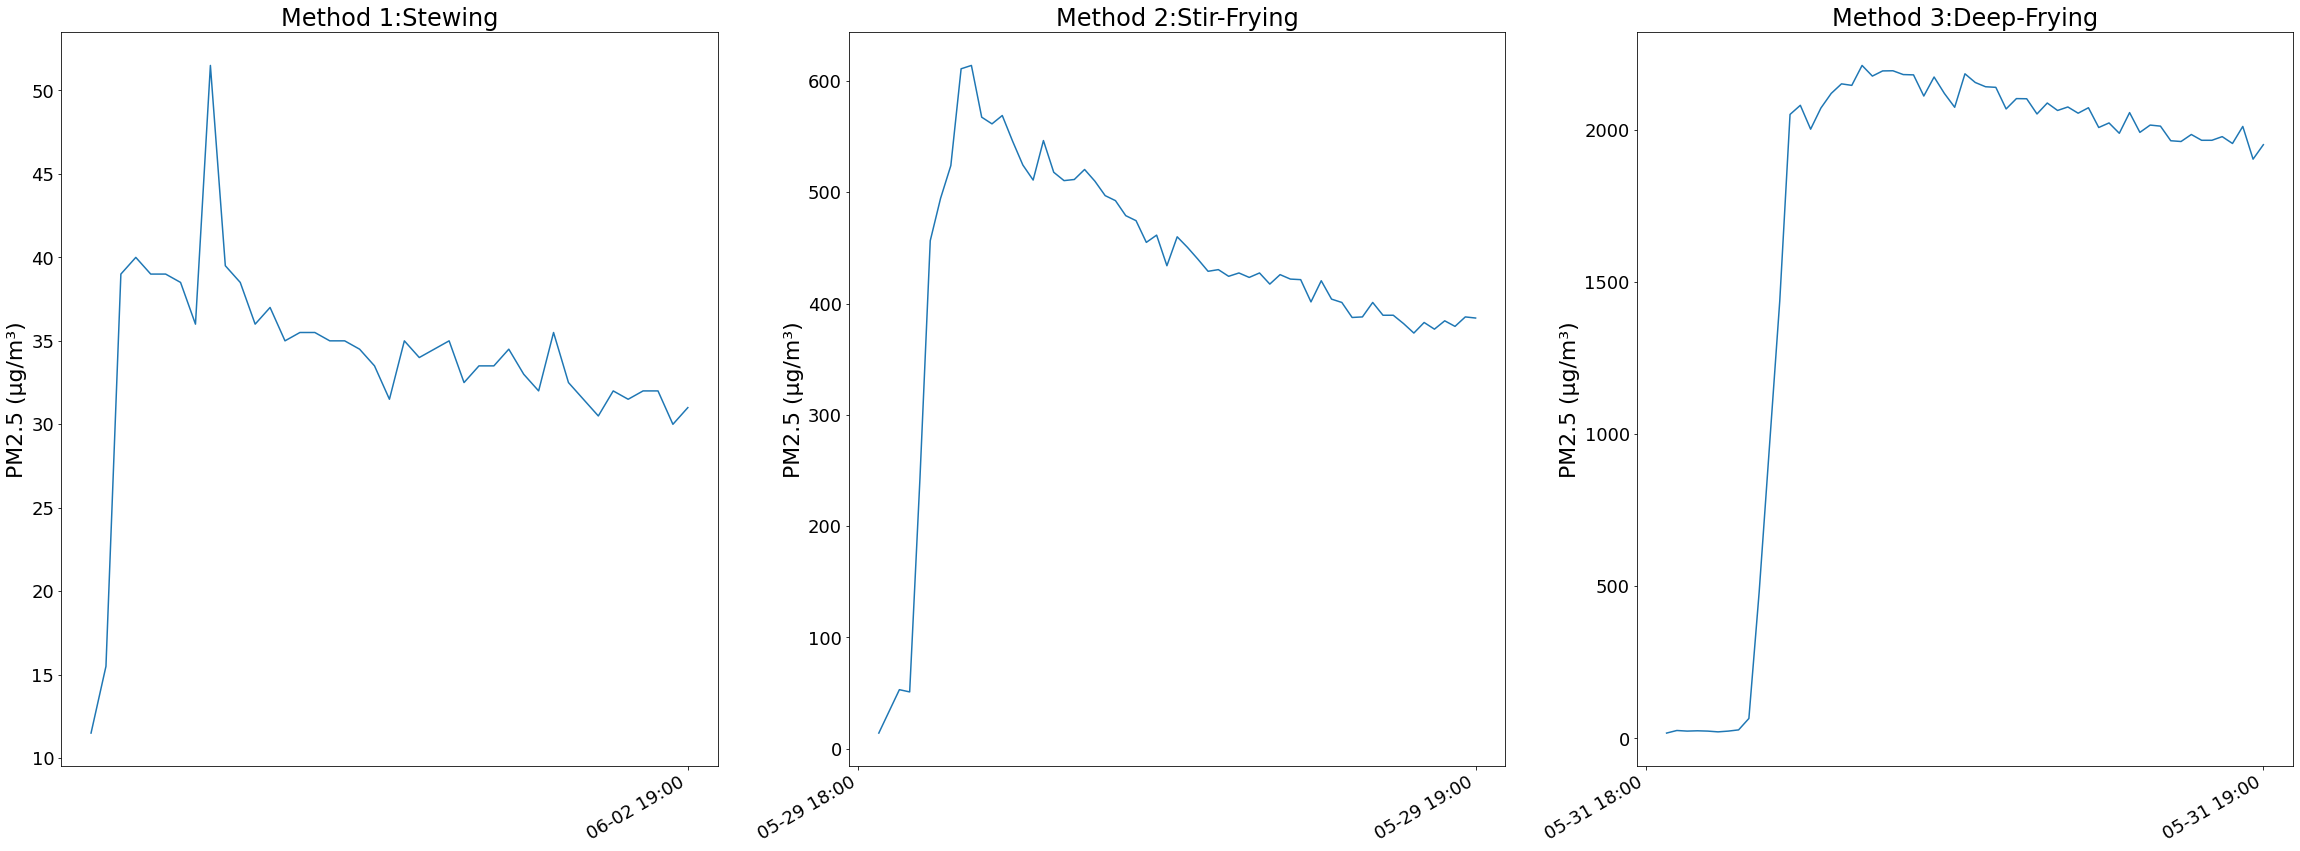

In [11]:
fig, axes = plt.subplots(ncols=3,figsize=(40, 15))

axes[0].plot(boil0602.index, boil0602['PM2.5'])

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[0].xaxis.set_major_locator(mdates.HourLocator())
axes[0].set_ylabel("PM2.5 (µg/m³)",fontsize=22)
axes[0].tick_params(axis='x', which='major', labelsize=18)
axes[0].tick_params(axis='x', which='minor', labelsize=18)
axes[0].tick_params(axis='y',  labelsize=18)
# rotate and align the tick labels so they look better
axes[0].set_title('Method 1:Stewing',fontsize = 24)

axes[1].plot(fry0529.index, fry0529['PM2.5'])
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[1].xaxis.set_major_locator(mdates.HourLocator())
axes[1].set_ylabel("PM2.5 (µg/m³)",fontsize=22)
axes[1].tick_params(axis='x', which='major', labelsize=18)
axes[1].tick_params(axis='x', which='minor', labelsize=18)
axes[1].tick_params(axis='y',  labelsize=18)
axes[1].set_title('Method 2:Stir-Frying',fontsize =24)
axes[2].plot(deepfry0531.index, deepfry0531['PM2.5'])
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

axes[2].xaxis.set_major_locator(mdates.HourLocator())
axes[2].set_ylabel("PM2.5 (µg/m³)",fontsize=22)
axes[2].tick_params(axis='x', which='major', labelsize=18)
axes[2].tick_params(axis='x', which='minor', labelsize=18)
axes[2].tick_params(axis='y',  labelsize=18)
axes[2].set_title('Method 3:Deep-Frying',fontsize =24)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

In [12]:
cor1625

,time,Eco2,TVOC,pm10_env,pm10_standard,PM2.5,pm25_standard,pm100_env,pm100_standard,tem,...,Humidity_out,Wind,Wind Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,deltatemp
time,,,,,,,,,,,,,,,,,,,,,
2021-06-22 21:05:00,2021-06-22 21:05:00,400.9,1.0,1.9,1.9,2.5,2.5,2.4,2.7,24.80,...,60,NNE,1.9,2.0 mph,30.32 in,0.00 in,0.00 in,0,10.2 w/m²,18.540
2021-06-22 21:10:00,2021-06-22 21:10:00,400.9,1.0,2.3,2.3,3.0,3.0,3.1,3.1,24.88,...,60,NE,3.0,3.1 mph,30.32 in,0.00 in,0.00 in,0,8.2 w/m²,18.784
2021-06-22 21:15:00,2021-06-22 21:15:00,400.9,1.0,2.3,2.3,3.4,3.4,3.6,3.5,25.08,...,60,NNE,4.0,4.4 mph,30.32 in,0.00 in,0.00 in,0,6.5 w/m²,19.344
2021-06-22 21:20:00,2021-06-22 21:20:00,400.9,1.0,3.0,3.0,3.8,3.8,3.7,3.8,25.29,...,60,NNE,3.5,3.7 mph,30.33 in,0.00 in,0.00 in,0,4.9 w/m²,19.822
2021-06-22 21:25:00,2021-06-22 21:25:00,400.9,1.0,2.6,2.6,3.5,3.5,3.7,3.6,25.47,...,60,NNE,5.0,5.4 mph,30.33 in,0.00 in,0.00 in,0,3.8 w/m²,20.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 16:35:00,2021-06-25 16:35:00,400.0,0.0,296.2,445.3,401.0,602.6,420.3,610.0,29.48,...,48,SW,2.0,2.0 mph,30.08 in,0.00 in,0.01 in,6,719.5 w/m²,13.464
2021-06-25 16:40:00,2021-06-25 16:40:00,400.0,0.0,392.1,589.1,746.0,1120.0,867.1,1224.2,29.68,...,46,South,1.9,1.9 mph,30.08 in,0.00 in,0.01 in,5,708.7 w/m²,13.324
2021-06-25 16:45:00,2021-06-25 16:45:00,400.0,0.0,409.9,616.0,846.8,1271.2,937.8,1420.8,29.90,...,48,SSW,2.5,2.6 mph,30.08 in,0.00 in,0.01 in,3,288.1 w/m²,14.820


# Correlation Analysis

In [13]:
##load data from Period 3

cor2 = pd.read_csv(os.path.join('correlation2.csv'))
cor2.time = pd.to_datetime(cor2.time)
cor2.index = cor2.time 
cor22 = cor2[['CO2','eCO2','TVOC','PM2.5','Temp_in','Humidity_in','Temp_out','Humidity_out','Wind Speed']]
cor1625 = cor1625[['CO2','Eco2','TVOC','Temp_in','Humidity_in','Temp_out','Humidity_out','Wind Speed']]

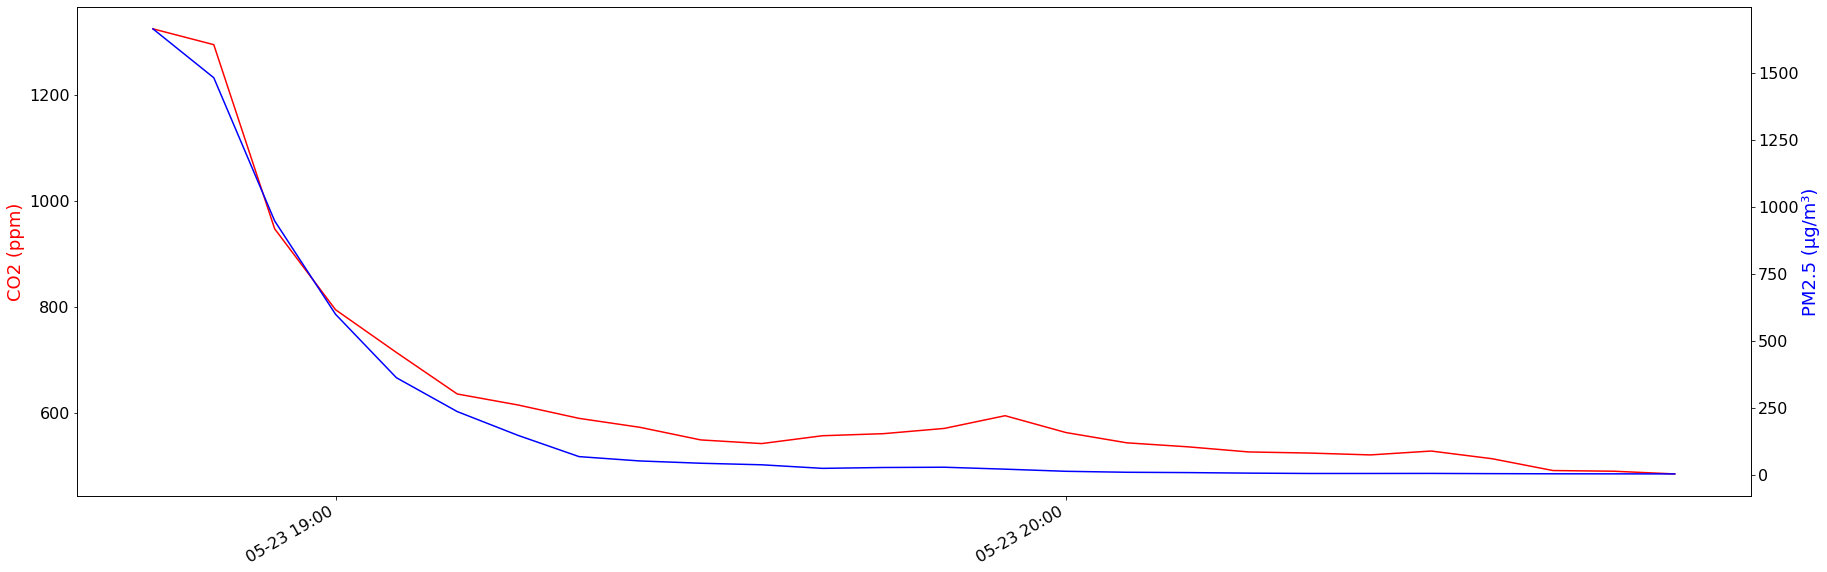

In [14]:
# plot data of period3
fig,ax = plt.subplots(figsize=(30, 10))

ax.plot(cor2.index, cor2['CO2'], color="red")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

ax.xaxis.set_major_locator(mdates.HourLocator())

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# set y-axis label
ax.set_ylabel("CO2 (ppm)",color="red",fontsize=18)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(cor2.index, cor2['PM2.5'],color = "blue")
ax2.set_ylabel("PM2.5 (µg/m³)",color = "blue",fontsize=18)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

ax2.xaxis.set_major_locator(mdates.HourLocator())
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='x', which='minor', labelsize=16)
ax.tick_params(axis='y',  labelsize=16)
ax2.tick_params(axis='x', which='major', labelsize=16)
ax2.tick_params(axis='x', which='minor', labelsize=16)
ax2.tick_params(axis='y',  labelsize=16)



In [15]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]


## Period 1

<AxesSubplot:>

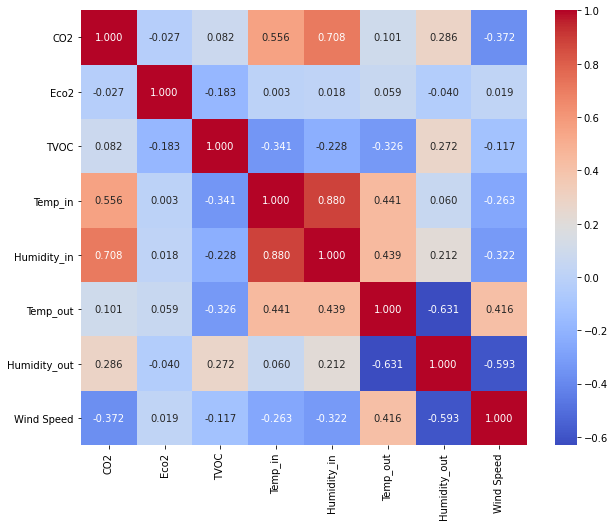

In [16]:
## correlation analysis of data in Period1
fig, ax = plt.subplots(figsize=(10,8))         
sns.heatmap(cor1625.corr(), cmap = 'coolwarm',annot=True, fmt='.3f')


In [17]:
## p-value
cor1625.corr(method=pearsonr_pval)

,CO2,Eco2,TVOC,Temp_in,Humidity_in,Temp_out,Humidity_out,Wind Speed
CO2,1.000000e+00,4.383903e-01,1.864285e-02,1.931321e-67,5.624141e-125,4.018236e-03,8.645611e-17,4.433308e-28
Eco2,4.383903e-01,1.000000e+00,1.439291e-07,9.224136e-01,5.999586e-01,9.402648e-02,2.565808e-01,5.855313e-01
TVOC,1.864285e-02,1.439291e-07,1.000000e+00,1.347629e-23,4.804264e-11,1.422134e-21,2.524086e-15,8.211665e-04
Temp_in,1.931321e-67,9.224136e-01,1.347629e-23,1.000000e+00,7.336047e-265,4.133695e-40,8.604564e-02,2.264871e-14
Humidity_in,5.624141e-125,5.999586e-01,4.804264e-11,7.336047e-265,1.000000e+00,8.301378e-40,9.315623e-10,4.673647e-21
Temp_out,4.018236e-03,9.402648e-02,1.422134e-21,4.133695e-40,8.301378e-40,1.000000e+00,9.655856e-92,1.775837e-35
Humidity_out,8.645611e-17,2.565808e-01,2.524086e-15,8.604564e-02,9.315623e-10,9.655856e-92,1.000000e+00,1.573599e-78
Wind Speed,4.433308e-28,5.855313e-01,8.211665e-04,2.264871e-14,4.673647e-21,1.775837e-35,1.573599e-78,1.000000e+00


## Period 3

<AxesSubplot:>

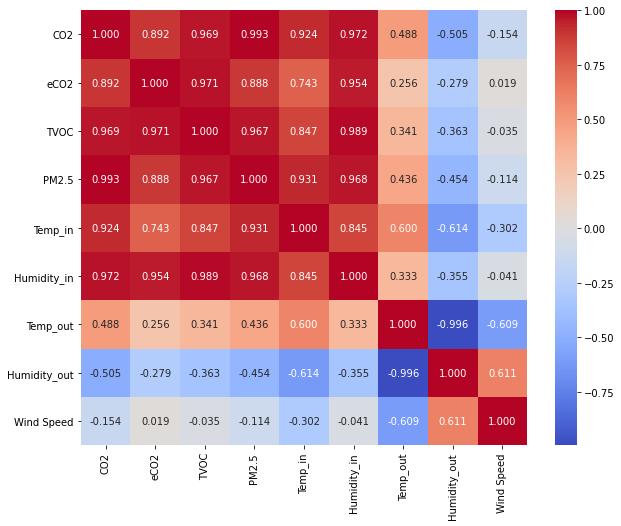

In [18]:
fig, ax = plt.subplots(figsize=(10,8))     
sns.heatmap(cor22.corr(), cmap = 'coolwarm',annot=True, fmt='.3f')


In [19]:
cor22.corr(method=pearsonr_pval)

,CO2,eCO2,TVOC,PM2.5,Temp_in,Humidity_in,Temp_out,Humidity_out,Wind Speed
CO2,1.000000e+00,9.425396e-10,4.861311e-16,1.002374e-23,1.767013e-11,1.285735e-16,1.152928e-02,8.521031e-03,0.453999
eCO2,9.425396e-10,1.000000e+00,1.990829e-16,1.487855e-09,1.351177e-05,4.265092e-14,2.075025e-01,1.674857e-01,0.925345
TVOC,4.861311e-16,1.990829e-16,1.000000e+00,9.098200e-16,4.716131e-08,2.149666e-21,8.774971e-02,6.833811e-02,0.866052
PM2.5,1.002374e-23,1.487855e-09,9.098200e-16,1.000000e+00,5.694066e-12,6.553669e-16,2.595142e-02,1.987088e-02,0.577927
Temp_in,1.767013e-11,1.351177e-05,4.716131e-08,5.694066e-12,1.000000e+00,5.426791e-08,1.195181e-03,8.398004e-04,0.134435
Humidity_in,1.285735e-16,4.265092e-14,2.149666e-21,6.553669e-16,5.426791e-08,1.000000e+00,9.641664e-02,7.476222e-02,0.840606
Temp_out,1.152928e-02,2.075025e-01,8.774971e-02,2.595142e-02,1.195181e-03,9.641664e-02,1.000000e+00,1.676284e-26,0.000968
Humidity_out,8.521031e-03,1.674857e-01,6.833811e-02,1.987088e-02,8.398004e-04,7.476222e-02,1.676284e-26,1.000000e+00,0.000913
Wind Speed,4.539995e-01,9.253450e-01,8.660518e-01,5.779272e-01,1.344355e-01,8.406065e-01,9.675657e-04,9.133040e-04,1.000000


# Mass Balance Model 

In [20]:
import math

## Curve Fitting for rising trend

[3.38841589e-03 1.20922236e+01]
[2.21730651e-05 4.98566969e-02]


Text(0, 0.5, 'CO2 (ppm)')

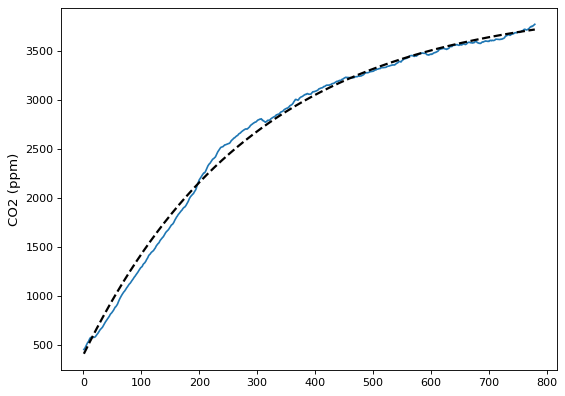

In [27]:
# fit curve fitting
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
from matplotlib import pyplot

figure(figsize=(8, 6), dpi=80)


df = read_csv('CO2630.csv')
#print(len(df))


x_list = df['time'].tolist()
y_list = df['concentration'].tolist()

x = np.array(x_list, float)
y = np.array(y_list, float)

                      
# plot raw data
pyplot.plot(x, y)

 
# define the function to fit to the data
def func(x, a, S):
	return (400 + (S/a)*(1 - np.exp(-a*x)))


# curve fit
pars, cov = curve_fit(f=func, xdata=x, ydata=y, bounds=([0, 0], [1, 100]))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
print(pars)
print(stdevs)


# Plot the fitted curve as an overlay on the actual data
pyplot.plot(x, func(x, *pars), linestyle='--', linewidth=2, color='black')
pyplot.ylabel("CO2 (ppm)",fontsize=12)


In [28]:
def y(x):
    return (400 + (1.20922236e+01/3.38841589e-03)*(1 - np.exp(-3.38841589e-03*x)))
mass = []

for x in range(2000):
    mass.append(y(x))
    x += 1

Text(0, 0.5, 'CO2 (ppm)')

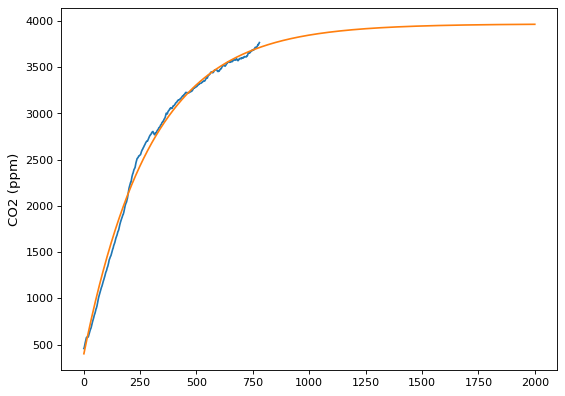

In [29]:

figure(figsize=(8, 6), dpi=80)

x_list = df['time'].tolist()
y_list = df['concentration'].tolist()

x = np.array(x_list, float)
y = np.array(y_list, float)

                      
# plot raw data
pyplot.plot(x, y)


x_list = list(range(1, 2001))
pyplot.plot(x_list, mass)
pyplot.ylabel("CO2 (ppm)",fontsize=12)

# Multiple LSTM Modeling

In [31]:
conda install -c pytorch pytorch

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install numpy~=1.19.0

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install darts~=0.8.1

  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
Note: you may need to restart the kernel to use updated packages.


In [36]:
%matplotlib inline

In [37]:
import torch
import math
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

torch.manual_seed(1); np.random.seed(1)  # for reproducibility

from glob import glob

Importing plotly failed. Interactive plots will not work.


In [38]:
## read 36 days' data into a list
folder = os.getcwd()+'/data/'
csv = glob(folder+'*.csv')
dfs = []
for i in csv:
    dfs.append(pd.read_csv(i))

##format time to datetime type
for i in range(0,36):
    dfs[i]['time'] = pd.to_datetime(dfs[i]['time'],format = '%d/%m/%Y %H:%M')

##format each time series into TimeSeries type for further use
series = []
for i in range(0,36):
    series.append(TimeSeries.from_dataframe(dfs[i], 'time', 'CO2'))

##scale data
scaled = []
scaler_data =Scaler()
for i in range(0,36):
    scaled.append(scaler_data.fit_transform(series[i]))

##choose 75%(integar)of each time series as the training dataset
train = []
for i in range(0,36):
    train.append(scaled[i][:math.ceil(len(scaled[i])*0.75)])

##choose another 25% data as test dataset
val = []
for i in range(0,36):
    val.append(scaled[i][math.ceil(len(scaled[i])*0.75):])   

##choose tem_in,tem_out,speed,hum_in,hum_out as covariates
cov = []
for i in range(0,36):
    data = TimeSeries.from_dataframe(dfs[i], 'time', 'tem_in').stack(TimeSeries.from_dataframe(dfs[i], 'time', 'tem_out'))
    data = data.stack(TimeSeries.from_dataframe(dfs[i], 'time', 'Speed'))
    data = data.stack(TimeSeries.from_dataframe(dfs[i], 'time', 'hum_in'))
    data = data.stack(TimeSeries.from_dataframe(dfs[i], 'time', 'hum_out'))
    cov.append(data)

##scale covariates
scaled_cov = []
scaler_data =Scaler()
for i in range(0,36):
    scaled_cov.append(scaler_data.fit_transform(cov[i]))

##choose 75%(integar)of each covariate time series as the training covariate dataset
train_cov = []
for i in range(0,36):
    train_cov.append(scaled_cov[i][:math.ceil(len(scaled_cov[i])*0.75)])

##choose another 25%(integar)of each covariate time series as the test covariate dataset
val_cov = []
for i in range(0,36):
    val_cov.append(scaled_cov[i][math.ceil(len(scaled_cov[i])*0.75):])   

In [40]:
##read 0625 data, the longest time series data
data625 = pd.read_csv('0625.csv')
data625['time'] = pd.to_datetime(data625['time'],format = '%d/%m/%Y %H:%M')
series625 = TimeSeries.from_dataframe(data625, 'time', 'CO2')
series_625_scaled = scaler_data.fit_transform(series625)
train_625, val_625 = series_625_scaled[:math.ceil(len(scaled_cov[i])*0.75)], series_625_scaled[math.ceil(len(scaled_cov[i])*0.75):]
covariate_625 = TimeSeries.from_dataframe(data625, 'time', 'Temp_in').stack(TimeSeries.from_dataframe(data625, 'time', 'Temp_out'))
covariate_625=covariate_625.stack(TimeSeries.from_dataframe(data625, 'time', 'Wind Speed'))
covariate_625=covariate_625.stack(TimeSeries.from_dataframe(data625, 'time', 'Humidity_in'))
covariate_625=covariate_625.stack(TimeSeries.from_dataframe(data625, 'time', 'Humidity_out'))
covariate_625 = scaler_data.fit_transform(covariate_625)
covariate_625_train, covariate_625_val = covariate_625[:math.ceil(len(scaled_cov[i])*0.75)], covariate_625[math.ceil(len(scaled_cov[i])*0.75):]

### Build and Select best LSTM models

In [41]:
##build a function to select best model
def multiLSTM(m,n):
    model_co2 = RNNModel(model = "LSTM",input_chunk_length=m, output_chunk_length=n, n_epochs=200)
    model_co2.fit(series= train, 
              covariates= train_cov, 
              verbose=True)
    accuracy = 0
    for i in range(0,36):
        backtest_co2 = model_co2.historical_forecasts(scaled[i],
                                              covariates=scaled_cov[i],
                                              start=0.75,
                                              forecast_horizon=n,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)
        accuracy = accuracy + mape(scaled[i], backtest_co2)
    
    print(m);
    print(n);
    print(accuracy)
    
    


In [42]:
##try models with different input chunk length and output chunk length, this will take a long time
##for m in range(6,25):
##    for n in range(6,13):
##        if m >= n:
##            multiLSTM(m,n)
            

### Model Prediction Performance
Finally two models are chosen:
* Model1:input chunk length: 20 output chunk length:6
* Model5:input chunk length: 22 output chunk length:11

The trained models and their results may change due to randomness

### Model 1 

In [43]:
## Model 1 
model_co2 = RNNModel(model = "LSTM",input_chunk_length=20, output_chunk_length=6, n_epochs=200)
model_co2.fit(series= train, 
              covariates= train_cov, 
              verbose=True)

[2021-07-29 14:37:24,389] INFO | darts.models.torch_forecasting_model | Train dataset contains 7812 samples.
[2021-07-29 14:37:24,389] INFO | darts.models.torch_forecasting_model | Train dataset contains 7812 samples.


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

MAPE (using covariates) = 1.68%


  0%|          | 0/35 [00:00<?, ?it/s]

MAPE (using covariates) = 2.43%


  0%|          | 0/37 [00:00<?, ?it/s]

MAPE (using covariates) = 1.94%


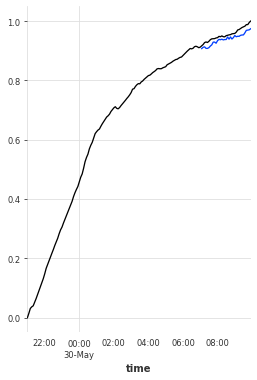

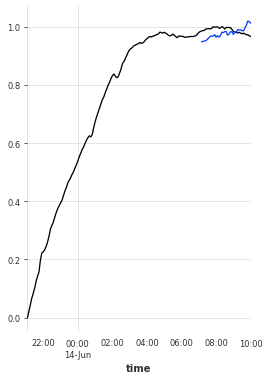

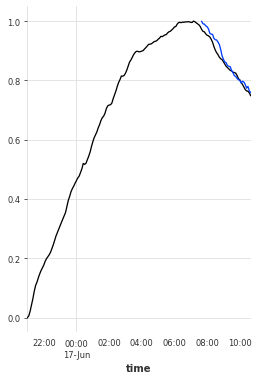

In [44]:
#Model 1---data529
fig = plt.figure(figsize=(4,6))
backtest_co2529 = model_co2.historical_forecasts(scaled[2],
                                              covariates=scaled_cov[2],
                                              start=0.75,
                                              forecast_horizon=6,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[2].plot(label='actual')

backtest_co2529.plot(label='forecast')


print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[2], backtest_co2529)))

##Model 1---data613
fig = plt.figure(figsize=(4,6))
backtest_co2613 = model_co2.historical_forecasts(scaled[17],
                                              covariates=scaled_cov[17],
                                              start=0.75,
                                              forecast_horizon=6,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[17].plot(label='actual')

backtest_co2613.plot(label='forecast')

print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[17], backtest_co2613)))


##Model 1--data616
fig = plt.figure(figsize=(4,6))
backtest_co2616 = model_co2.historical_forecasts(scaled[12],
                                              covariates=scaled_cov[12],
                                              start=0.75,
                                              forecast_horizon=6,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[12].plot(label='actual')

backtest_co2616.plot(label='forecast')

print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[12], backtest_co2616)))


  0%|          | 0/786 [00:00<?, ?it/s]

MAPE (using covariates) = 7.38%


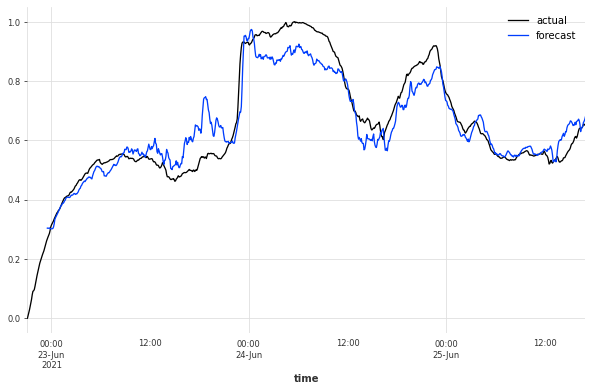

In [45]:
##Model 1---625data

fig = plt.figure(figsize=(10,6))

backtest_co2 = model_co2.historical_forecasts(series_625_scaled,
                                              covariates=covariate_625,
                                              start=0.03,
                                              forecast_horizon=6,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



series_625_scaled.plot(label='actual')

backtest_co2.plot(label='forecast')
plt.legend();
print('MAPE (using covariates) = {:.2f}%'.format(mape(series_625_scaled, backtest_co2)))

### Model 5

In [48]:
## Model 5 
model_co21 = RNNModel(model = "LSTM",input_chunk_length=22, output_chunk_length=11, n_epochs=200)
model_co21.fit(series= train, 
              covariates= train_cov, 
              verbose=True)

[2021-07-29 15:17:11,860] INFO | darts.models.torch_forecasting_model | Train dataset contains 7560 samples.
[2021-07-29 15:17:11,860] INFO | darts.models.torch_forecasting_model | Train dataset contains 7560 samples.


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

MAPE (using covariates) = 1.76%


  0%|          | 0/30 [00:00<?, ?it/s]

MAPE (using covariates) = 9.12%


  0%|          | 0/32 [00:00<?, ?it/s]

MAPE (using covariates) = 6.24%


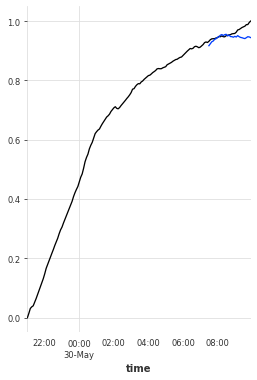

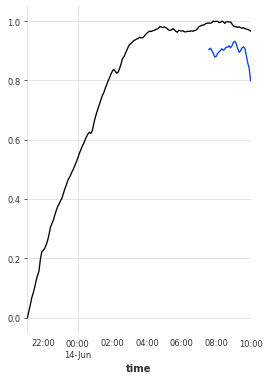

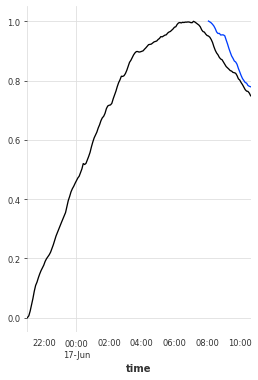

In [49]:
#Model 5---data529
fig = plt.figure(figsize=(4,6))
backtest_co25291 = model_co21.historical_forecasts(scaled[2],
                                              covariates=scaled_cov[2],
                                              start=0.75,
                                              forecast_horizon=11,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[2].plot(label='actual')

backtest_co25291.plot(label='forecast')


print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[2], backtest_co25291)))

##Model 5---data613
fig = plt.figure(figsize=(4,6))
backtest_co26131 = model_co21.historical_forecasts(scaled[17],
                                              covariates=scaled_cov[17],
                                              start=0.75,
                                              forecast_horizon=11,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[17].plot(label='actual')

backtest_co26131.plot(label='forecast')

print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[17], backtest_co26131)))


##Model 5--data616
fig = plt.figure(figsize=(4,6))
backtest_co26161 = model_co21.historical_forecasts(scaled[12],
                                              covariates=scaled_cov[12],
                                              start=0.75,
                                              forecast_horizon=11,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



scaled[12].plot(label='actual')

backtest_co26161.plot(label='forecast')

print('MAPE (using covariates) = {:.2f}%'.format(mape(scaled[12], backtest_co26161)))


  0%|          | 0/781 [00:00<?, ?it/s]

MAPE (using covariates) = 9.03%


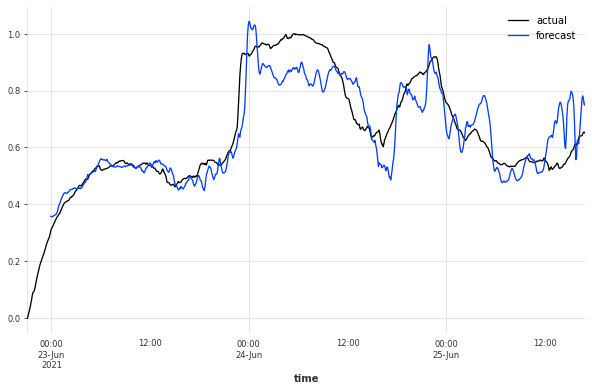

In [50]:
##Model 5---625data

fig = plt.figure(figsize=(10,6))

backtest_co21 = model_co21.historical_forecasts(series_625_scaled,
                                              covariates=covariate_625,
                                              start=0.03,
                                              forecast_horizon=11,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)



series_625_scaled.plot(label='actual')

backtest_co21.plot(label='forecast')
plt.legend();
print('MAPE (using covariates) = {:.2f}%'.format(mape(series_625_scaled, backtest_co21)))

# Feedforward neural network

### Train / Validation split
Let's keep the last 36 months of both series as validation:

In [67]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
# neural network with keras 
import tensorflow
from numpy import loadtxt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [70]:
# read data
dataset = pd.read_csv('0523_ann.csv')
X = dataset.to_numpy()[:,0:6]
y = dataset.to_numpy()[:,6]
y = pd.get_dummies(y).to_numpy()

In [71]:
# read data
dataset_test = pd.read_csv('ann_test.csv')
X_test = dataset_test.to_numpy()[:,0:6]
y_test = dataset_test.to_numpy()[:,6]
y_test = pd.get_dummies(y_test).to_numpy()

In [72]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.01)
model2 = Sequential()
model2.add(Dense(9, input_dim=6, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(11, activation='softmax'))   # Final Layer using Softmax

model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])  

In [74]:
## define the neural network model to try different hidden layer neuron numbers
def ann_model(n):
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model = Sequential()
    model.add(Dense(n, input_dim=6, activation='relu',kernel_initializer='he_uniform'))
   
    model.add(Dense(11, activation='softmax'))  
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, y, epochs=300, batch_size=10,verbose=1)
    _, accuracy1 = model.evaluate(X, y)
    print('Accuracy: %.2f' % (accuracy1*100))
    _, accuracy = model.evaluate(X_test, y_test)
    print('Accuracy: %.2f' % (accuracy*100))
    return model

In [75]:
## try neuron from 6 to 11
for i in range(6,12):
    ann_model(i)

Epoch 1/300
23/23 [==============================] - 1s 2ms/step - loss: 2.5413 - accuracy: 0.1312 
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 2.1343 - accuracy: 0.2308
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 1.9491 - accuracy: 0.2670
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 1.8168 - accuracy: 0.3077
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 1.7237 - accuracy: 0.3529
Epoch 6/300
23/23 [==============================] - 0s 1ms/step - loss: 1.6443 - accuracy: 0.3529
Epoch 7/300
23/23 [==============================] - 0s 1ms/step - loss: 1.5849 - accuracy: 0.3710
Epoch 8/300
23/23 [==============================] - 0s 1ms/step - loss: 1.5446 - accuracy: 0.3846
Epoch 9/300
23/23 [==============================] - 0s 1ms/step - loss: 1.4975 - accuracy: 0.4072
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 1.4695 - accuracy: 0.4299
Epoch 11